In [1]:
import re

# File path
file_path = 'data/traceroutes/shorst_traceroute_srv6.txt'

try:
    # Read the file content
    with open(file_path, 'r') as file:
        data = file.read()

    # Regex to extract RTT values from lines like:
    # Last Line: 3     some-host (192.0.2.1)   12.34 ms
    pattern = re.compile(r'Last Line: \d+\s+.*\s+\((.*?)\)\s+([\d.]+)\s+ms')
    
    # Extract matches
    matches = pattern.findall(data)
    
    # Extract RTT values
    srv6_rtt_values = [float(match[1]) for match in matches]
    
    # Print results
    for i, rtt in enumerate(srv6_rtt_values, start=1):
        print(f"Execution {i}: RTT = {rtt:.2f} ms")

except FileNotFoundError:
    print(f"File not found: {file_path}")
except Exception as e:
    print(f"An error occurred: {e}")


Execution 1: RTT = 154.91 ms
Execution 2: RTT = 154.60 ms
Execution 3: RTT = 154.49 ms
Execution 4: RTT = 154.49 ms
Execution 5: RTT = 154.51 ms
Execution 6: RTT = 154.47 ms
Execution 7: RTT = 154.50 ms
Execution 8: RTT = 154.48 ms
Execution 9: RTT = 154.47 ms
Execution 10: RTT = 154.45 ms
Execution 11: RTT = 154.49 ms
Execution 12: RTT = 154.46 ms
Execution 13: RTT = 154.49 ms
Execution 14: RTT = 154.58 ms
Execution 15: RTT = 154.46 ms
Execution 16: RTT = 154.46 ms
Execution 17: RTT = 154.46 ms
Execution 18: RTT = 154.50 ms
Execution 19: RTT = 154.46 ms
Execution 20: RTT = 154.47 ms
Execution 21: RTT = 154.39 ms
Execution 22: RTT = 154.47 ms
Execution 23: RTT = 154.47 ms
Execution 24: RTT = 154.44 ms
Execution 25: RTT = 154.47 ms
Execution 26: RTT = 154.47 ms
Execution 27: RTT = 154.46 ms
Execution 28: RTT = 154.45 ms
Execution 29: RTT = 154.47 ms
Execution 30: RTT = 154.46 ms
Execution 31: RTT = 154.44 ms
Execution 32: RTT = 154.47 ms
Execution 33: RTT = 154.35 ms
Execution 34: RTT =

In [2]:
import re

# File path
file_path = 'data/traceroutes/shorst_traceroute.txt'

# Read file content
with open(file_path, 'r') as file:
    data = file.read()

# Regex pattern to match lines like:
# Last Line: 3     some-host (192.0.2.1)   12.34 ms
pattern = re.compile(r'Last Line: \d+\s+.*\s+\((.*?)\)\s+([\d.]+)\s+ms')

# Find all RTT matches
matches = pattern.findall(data)

# Extract RTT values as float
shorst_rtt_values = [float(rtt) for _, rtt in matches]

# Print extracted RTT values
for i, rtt in enumerate(shorst_rtt_values, start=1):
    print(f"Execution {i}: RTT = {rtt:.2f} ms")


Execution 1: RTT = 154.91 ms
Execution 2: RTT = 154.51 ms
Execution 3: RTT = 154.47 ms
Execution 4: RTT = 154.48 ms
Execution 5: RTT = 154.46 ms
Execution 6: RTT = 154.47 ms
Execution 7: RTT = 154.44 ms
Execution 8: RTT = 154.48 ms
Execution 9: RTT = 154.45 ms
Execution 10: RTT = 154.45 ms
Execution 11: RTT = 154.48 ms
Execution 12: RTT = 154.46 ms
Execution 13: RTT = 154.43 ms
Execution 14: RTT = 154.47 ms
Execution 15: RTT = 154.50 ms
Execution 16: RTT = 154.52 ms
Execution 17: RTT = 154.47 ms
Execution 18: RTT = 154.49 ms
Execution 19: RTT = 154.46 ms
Execution 20: RTT = 154.47 ms
Execution 21: RTT = 154.42 ms
Execution 22: RTT = 154.44 ms
Execution 23: RTT = 154.45 ms
Execution 24: RTT = 154.46 ms
Execution 25: RTT = 154.45 ms
Execution 26: RTT = 154.47 ms
Execution 27: RTT = 154.47 ms
Execution 28: RTT = 154.48 ms
Execution 29: RTT = 154.49 ms
Execution 30: RTT = 154.49 ms
Execution 31: RTT = 154.47 ms
Execution 32: RTT = 154.50 ms
Execution 33: RTT = 154.46 ms
Execution 34: RTT =

In [3]:
base_line = 153.98
baselines = [base_line for i in range(len(shorst_rtt_values))]

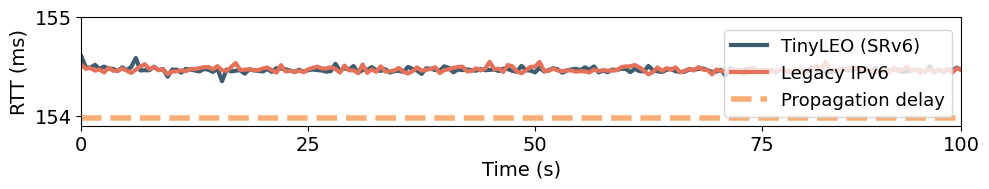

In [6]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['pdf.fonttype'] = 42 

def plot_rtt_time_series(data_list, labels, colors):
    """
    Plot RTT values over time for multiple methods.

    Args:
        data_list (list of list): RTT values for each method
        labels (list of str): Legend labels
        colors (list of str): Line colors
    """
    plt.figure(figsize=(10, 2))
    
    for rtt, label, color in zip(data_list, labels, colors):
        timestamps = range(len(rtt))
        plt.plot(
            timestamps, rtt,
            label=label,
            color=color,
            linewidth=4 if label == 'Propagation delay' else 3,
            linestyle='--' if label == 'Propagation delay' else '-'
        )

    plt.xlabel('Time (s)', fontsize=14)
    plt.ylabel('RTT (ms)', fontsize=14)
    plt.tick_params(axis='both', labelsize=14)
    plt.xlim(0, 194)
    plt.xticks([0, 50, 100, 150, 194], [0, 25, 50, 75, 100])
    plt.ylim(153.9, 155)
    plt.yticks([154, 155])

    # Legend
    plt.legend(fontsize=13, loc='lower right')

    plt.tight_layout()
    plt.savefig('figures/figure19b.pdf', dpi=300, bbox_inches='tight')
    plt.savefig('figures/figure19b.png', dpi=300, bbox_inches='tight')
    plt.show()

# Input data
data_list = [
    srv6_rtt_values[1:],       # TinyLEO (SRv6)
    shorst_rtt_values[1:],     # Legacy IPv6
    baselines[1:]              # Propagation delay baseline
]
labels = ['TinyLEO (SRv6)', 'Legacy IPv6', 'Propagation delay']
colors = ['#3D5C6F', '#E47159', '#F9AE78']

# Plot
plot_rtt_time_series(data_list, labels, colors)
